<a href="https://colab.research.google.com/github/ahcamachod/2160-aprendiendo-a-clasificar-datos-con-ml/blob/main/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv("marketing_inversiones.csv")

In [8]:
datos.head()  # Display the first few rows of the dataset

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [12]:
import plotly.express as px

In [24]:
fig = px.histogram(datos, x="adherencia_inversion", text_auto = True,
             title = "Distribución de la adherencia a la inversión",
             labels= {"adherencia_inversion": "Adherencia a la Inversión"},
             width=500, height=500)
fig.update_layout(title_x=0.5)

In [26]:
fig = px.histogram(datos, x="estado_civil", text_auto = True,
             title = "Distribución del Estado Civil",
             labels= {"estado_civil": "Estado Civil"},
             width=500,
             height=500,
             color="adherencia_inversion",
             barmode='group')
fig.update_layout(title_x=0.5)

In [27]:
fig = px.histogram(datos, x="escolaridad", text_auto = True,
             title = "Distribución de la Escolaridad",
             labels= {"escolaridad": "Escolaridad"},
             width=500,
             height=500,
             color="adherencia_inversion",
             barmode='group')
fig.update_layout(title_x=0.5)

In [28]:
fig = px.histogram(datos, x="default", text_auto = True,
             title = "Distribución de deudores",
             labels= {"default": "Deudores"},
             width=500,
             height=500,
             color="adherencia_inversion",
             barmode='group')
fig.update_layout(title_x=0.5)

In [29]:
fig = px.histogram(datos, x="prestatario", text_auto = True,
             title = "Distribución de prestatarios",
             labels= {"prestatario": "Prestatarios"},
             width=500,
             height=500,
             color="adherencia_inversion",
             barmode='group')
fig.update_layout(title_x=0.5)

### Variables numéricas

In [ ]:
px.box(datos, 
       x="adherencia_inversion",  #x-axis
       y="edad",  #y-axis
       color="adherencia_inversion", # plot another variable 
       title="Boxplot de Adherencia a la Inversión por Edad", 
       labels={"adherencia_inversion": "Adherencia a la Inversión", "edad": "Edad"},
       width=500, height=500)

In [42]:
px.box(datos, 
       x="adherencia_inversion",  #x-axis
       y="saldo",  #y-axis
       color="adherencia_inversion", # plot another variable 
       title="Boxplot de Adherencia a la Inversión por Saldo", 
       labels={"adherencia_inversion": "Adherencia a la Inversión", "saldo": "Saldo"},
       width=600, height=400)

In [43]:
px.box(datos, 
       x="adherencia_inversion",  #x-axis
       y="ultimo_contacto",  #y-axis
       color="adherencia_inversion", # plot another variable 
       title="Boxplot de Adherencia a la Inversión por Último Contacto", 
       labels={"adherencia_inversion": "Adherencia a la Inversión", "ultimo_contacto": "Último Contacto"},
       width=600, height=400)

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [44]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


In [55]:
X = datos.drop("adherencia_inversion", axis=1)
Y = datos["adherencia_inversion"]

In [54]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


In [56]:
Y

0       si
1       si
2       no
3       si
4       si
        ..
1263    si
1264    si
1265    si
1266    si
1267    si
Name: adherencia_inversion, Length: 1268, dtype: object

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

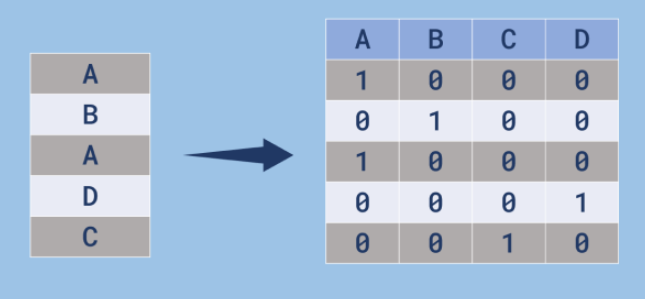

In [58]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [59]:
columnas = X.columns

In [ ]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), ['estado_civil', 'escolaridad', 'default', 'prestatario']),
                                  remainder='passthrough',
                                  sparse_threshold = 0.0,
                                  force_int_remainder_cols=False)

In [61]:
X = one_hot.fit_transform(X)

c:\Users\MetalSnake756\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning:

The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.



In [62]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [63]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]], shape=(1268, 12))

In [64]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoder = LabelEncoder()

In [67]:
Y = label_encoder.fit_transform(Y)


In [68]:
Y

array([1, 1, 0, ..., 1, 1, 1], shape=(1268,))

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [71]:
from sklearn.dummy import DummyClassifier

In [76]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)  # Evaluate the dummy classifier on the test set

0.6056782334384858

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [81]:
modelo_arbol.score(X_test, y_test)

0.668769716088328

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [84]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

[Text(0.5341102248953975, 0.9736842105263158, 'ultimo_contacto <= 322.5\ngini = 0.479\nsamples = 951\nvalue = [574, 377]\nclass = no'),
 Text(0.22101638772663879, 0.9210526315789473, 'ultimo_contacto <= 141.5\ngini = 0.338\nsamples = 571\nvalue = [448, 123]\nclass = no'),
 Text(0.37756330631101814, 0.9473684210526316, 'True  '),
 Text(0.06834030683403068, 0.868421052631579, 'ultimo_contacto <= 86.5\ngini = 0.159\nsamples = 253\nvalue = [231, 22]\nclass = no'),
 Text(0.02789400278940028, 0.8157894736842105, 'ultimo_contacto <= 75.5\ngini = 0.049\nsamples = 120\nvalue = [117, 3]\nclass = no'),
 Text(0.016736401673640166, 0.7631578947368421, 'edad <= 29.5\ngini = 0.021\nsamples = 93\nvalue = [92, 1]\nclass = no'),
 Text(0.011157601115760111, 0.7105263157894737, 'saldo <= 762.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = no'),
 Text(0.005578800557880056, 0.6578947368421053, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = no'),
 Text(0.016736401673640166, 0.6578947368421053, 'gini

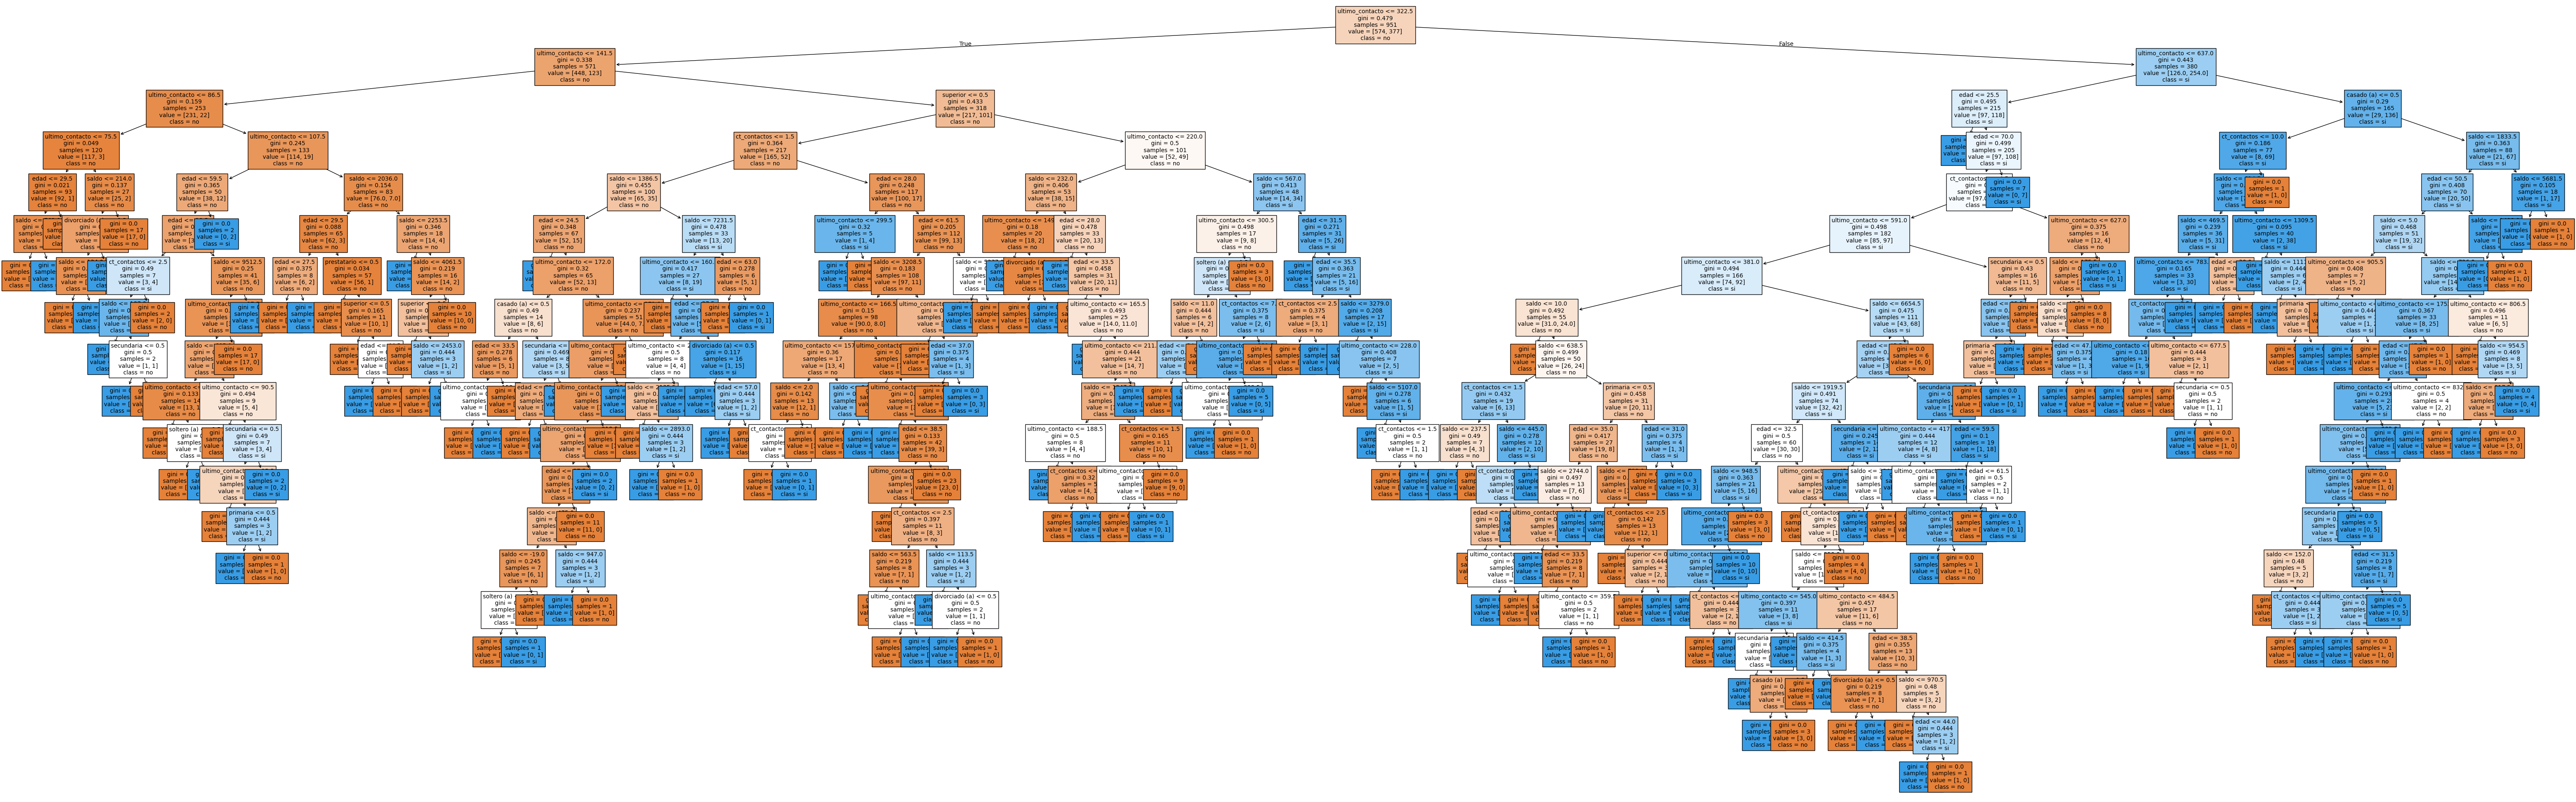

In [86]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'si'], feature_names=valores_columnas, fontsize=10)

In [87]:
modelo_arbol.score(X_train, y_train)

1.0

In [88]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [89]:
modelo_arbol.score(X_test, y_test)

0.7350157728706624

[Text(0.5, 0.875, 'ultimo_contacto <= 322.5\ngini = 0.479\nsamples = 951\nvalue = [574, 377]\nclass = no'),
 Text(0.25, 0.625, 'ultimo_contacto <= 141.5\ngini = 0.338\nsamples = 571\nvalue = [448, 123]\nclass = no'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'ultimo_contacto <= 86.5\ngini = 0.159\nsamples = 253\nvalue = [231, 22]\nclass = no'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 120\nvalue = [117, 3]\nclass = no'),
 Text(0.1875, 0.125, 'gini = 0.245\nsamples = 133\nvalue = [114, 19]\nclass = no'),
 Text(0.375, 0.375, 'superior <= 0.5\ngini = 0.433\nsamples = 318\nvalue = [217, 101]\nclass = no'),
 Text(0.3125, 0.125, 'gini = 0.364\nsamples = 217\nvalue = [165, 52]\nclass = no'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 101\nvalue = [52, 49]\nclass = no'),
 Text(0.75, 0.625, 'ultimo_contacto <= 637.0\ngini = 0.443\nsamples = 380\nvalue = [126.0, 254.0]\nclass = si'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'edad <= 25.5\ngini = 0.495\nsamples = 215\nvalu

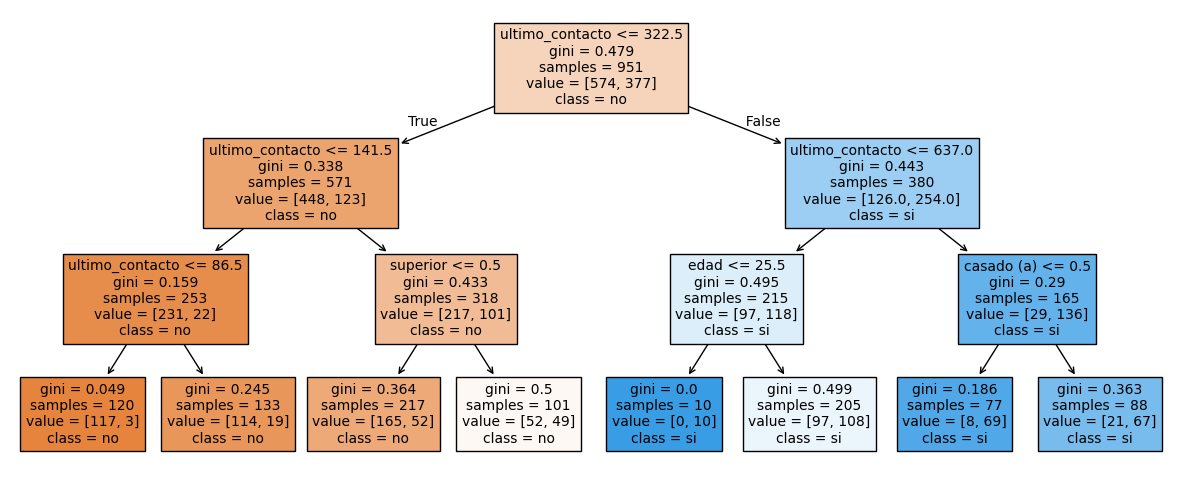

In [90]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'si'], feature_names=valores_columnas, fontsize=10)

In [91]:
modelo_arbol.score(X_test, y_test)

0.7350157728706624

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)
pd.DataFrame(X_train_normalizada)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.441176,0.074094,0.183958,0.000000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.411765,0.059629,0.098943,0.032258
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.411765,0.073811,0.066282,0.000000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.544118,0.087569,0.036023,0.032258
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.279412,0.085057,0.083093,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
946,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.485294,0.008347,0.232469,0.000000
947,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.104403,0.045149,0.000000
948,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.220588,0.230805,0.052354,0.161290
949,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220588,0.042653,0.075889,0.032258


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn = KNeighborsClassifier()

In [96]:
knn.fit(X_train_normalizada, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [97]:
X_test_normalizada = normalizacion.transform(X_test)

In [98]:
knn.score(X_test_normalizada, y_test)


0.7129337539432177

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [99]:
lista = [('dummy', dummy, X_test),
         ('de arbol', modelo_arbol, X_test), 
         ('knn', knn, X_test_normalizada)]

In [100]:
for i in lista:
    print(f"El modelo {i[0]} tiene una exactitud de: {i[1].score(i[2], y_test)}")

El modelo dummy tiene una exactitud de: 0.6056782334384858
El modelo de arbol tiene una exactitud de: 0.7350157728706624
El modelo knn tiene una exactitud de: 0.7129337539432177


In [ ]:
import pickle 

```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [128]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [129]:
nuevo_dato = pd.DataFrame(nuevo_dato)

In [130]:
nuevo_dato

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


In [131]:
modelo_one_hot = pd.read_pickle("modelo_one_hot_encoder.pkl")

In [132]:
modelo_arbol = pd.read_pickle("modelo_arbol.pkl")

In [133]:
modelo_arbol.predict(nuevo_dato)

c:\Users\MetalSnake756\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



ValueError: could not convert string to float: 'soltero (a)'

In [134]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)

In [135]:
modelo_arbol.predict(nuevo_dato)

array(['si'], dtype=object)